# Zero vs Null
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/null.jpg" width=700 >



Ci sono differenze nel modo in cui questi valori vengono trattati e gestiti in Pandas:

- NaN (Not a Number):
È una rappresentazione a virgola mobile per valori numerici mancanti.
È supportato da tipi di dati come float64.
Sorge principalmente in colonne numeriche a causa di operazioni come la divisione per zero, operazioni matematiche con risultati non definiti o inserendo esplicitamente valori NaN.

- None o null: Rappresenta l'assenza di un valore, in particolare nelle colonne di oggetti/stringhe.
È un oggetto Python (None) e viene utilizzato principalmente in colonne con dtype 'object' o 'str' nei DataFrame di Pandas.
È solitamente il risultato di non avere un valore specifico o per l'assenza di dati in colonne non numeriche.
Quando si lavora con DataFrame di Pandas, è importante gestire correttamente entrambi i tipi di dati mancanti. Pandas fornisce metodi come isna(), notna(), fillna() e dropna() per gestire valori NaN e null, indipendentemente che siano NaN o None




In [1]:
import pandas as pd
import numpy as np

# Creazione di un DataFrame con valori NaN e None
data = {'A': [1, 2, np.nan, 4],
        'B': ['a', 'b', None, 'd']}
df = pd.DataFrame(data)
df

A     B
0  1.0     a
1  2.0     b
2  NaN  None
3  4.0     d

In [2]:
# Verifica dei valori NaN
valori_nan = df.isna()
print("Valori NaN:\n", valori_nan)

Valori NaN:
        A      B
0  False  False
1  False  False
2   True   True
3  False  False


In [3]:
# Verifica dei valori None
valori_none = df.isnull()  # In alternativa, è possibile usare df.isna()
print("Valori None:\n", valori_none)

Valori None:
        A      B
0  False  False
1  False  False
2   True   True
3  False  False


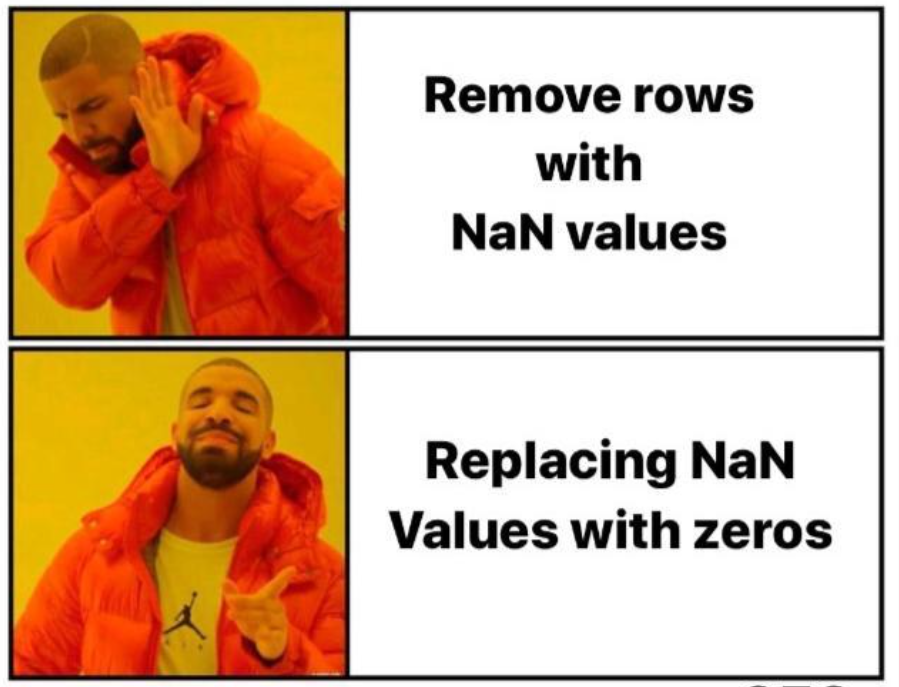

In [ ]:
from IPython.display import Image
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/a1.png')

## Method 1: Usare fillna() per una singola colonna

In [4]:
# importing libraries
import pandas as pd
import numpy as np

data = {'numeri': [2, 3, 5, 7, 11, 13,np.nan, 19, 23,np.nan,'n.d.' ]}

df = pd.DataFrame(data, columns =['numeri'])
df

numeri
0       2
1       3
2       5
3       7
4      11
5      13
6     NaN
7      19
8      23
9     NaN
10   n.d.

In [5]:
df.dtypes

numeri    object
dtype: object

In [ ]:
### sostituire n.d??
df = df.replace('n.d.', 0)
df

numeri
0      2.0
1      3.0
2      5.0
3      7.0
4     11.0
5     13.0
6      NaN
7     19.0
8     23.0
9      NaN
10     0.0

In [ ]:
df.dtypes

numeri    float64
dtype: object

In [ ]:
#na = Nan
df['numeri']=df['numeri'].fillna(0)
df

numeri
0      2.0
1      3.0
2      5.0
3      7.0
4     11.0
5     13.0
6      0.0
7     19.0
8     23.0
9      0.0
10     0.0

In [ ]:
df['numeri']=df['numeri'].fillna('miao')
df

numeri
0       2
1       3
2       5
3       7
4      11
5      13
6    miao
7      19
8      23
9    miao
10   n.d.

In [ ]:
df['numeri']=df['numeri'].fillna(df['numeri'].mean())
df

numeri
0    2.000000
1    3.000000
2    5.000000
3    7.000000
4   11.000000
5   13.000000
6    9.222222
7   19.000000
8   23.000000
9    9.222222
10   0.000000

In [ ]:
# df['numeri']=df['numeri'].fillna(df['numeri'].max())
# df

## Method 2: Usare replace() per una singola colonna

In [6]:
data = {'Car Model Number': [223, np.nan, 237, 195, np.nan,
                             575, 110, 313, np.nan, 190, 143,
                             np.nan],
       'Engine Number': [4511, np.nan, 7570, 1565, 1450, 3786,
                         2995, 5345, 7777, 2323, 2785, 1120]}

df = pd.DataFrame(data, columns =['Car Model Number'])
df

Car Model Number
0              223.0
1                NaN
2              237.0
3              195.0
4                NaN
5              575.0
6              110.0
7              313.0
8                NaN
9              190.0
10             143.0
11               NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car Model Number  8 non-null      float64
dtypes: float64(1)
memory usage: 224.0 bytes


In [ ]:
df['Car Model Number'] = df['Car Model Number'].replace(np.nan, 0)
df

Car Model Number
0              223.0
1                0.0
2              237.0
3              195.0
4                0.0
5              575.0
6              110.0
7              313.0
8                0.0
9              190.0
10             143.0
11               0.0

In [ ]:
df['Car Model Number'] = df['Car Model Number'].replace(np.nan, df['Car Model Number'].mean())
df

Car Model Number
0              223.0
1                0.0
2              237.0
3              195.0
4                0.0
5              575.0
6              110.0
7              313.0
8                0.0
9              190.0
10             143.0
11               0.0

## Method 3: Usare fillna() per tutto il dataframe

In [ ]:
data = {'insieme_1': [0, 1, 1, 2, 3, 5, np.nan,
                         13, 21, np.nan],
       'insieme_2': [3, 7, np.nan, 23, 31, 41,
                        np.nan, 59, 67, np.nan],
       'insieme_3': [2, 3, 5, np.nan, 11, 13, 17,
                        19, 23, np.nan]}
df = pd.DataFrame(data)
df

insieme_1  insieme_2  insieme_3
0        0.0        3.0        2.0
1        1.0        7.0        3.0
2        1.0        NaN        5.0
3        2.0       23.0        NaN
4        3.0       31.0       11.0
5        5.0       41.0       13.0
6        NaN        NaN       17.0
7       13.0       59.0       19.0
8       21.0       67.0       23.0
9        NaN        NaN        NaN

In [ ]:
# df = df.fillna(0)
# df

In [ ]:
# df = df.fillna(20000)
# df

In [ ]:
df.mean()

insieme_1     5.750
insieme_2    33.000
insieme_3    11.625
dtype: float64

In [ ]:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
df

insieme_1  insieme_2  insieme_3
0       0.00        3.0      2.000
1       1.00        7.0      3.000
2       1.00       33.0      5.000
3       2.00       23.0     11.625
4       3.00       31.0     11.000
5       5.00       41.0     13.000
6       5.75       33.0     17.000
7      13.00       59.0     19.000
8      21.00       67.0     23.000
9       5.75       33.0     11.625

In [ ]:
df1 = pd.DataFrame(np.random.randn(10,3))
df1.iloc[3:5,0] = np.nan
df1.iloc[4:6,1] = np.nan
df1.iloc[5:8,2] = np.nan
df1

0         1         2
0  0.757751 -0.052936  0.310562
1  1.075163 -0.826748  1.783801
2 -0.804076  1.608405  1.032421
3       NaN  0.705612 -1.303452
4       NaN       NaN  0.040098
5  1.856820       NaN       NaN
6 -0.318204 -0.214413       NaN
7  1.615764  3.201748       NaN
8  0.431381 -0.651510 -1.567631
9  0.703532  0.514304 -0.401295

In [ ]:
df1.mean()

0    0.664766
1    0.535558
2   -0.015071
dtype: float64

In [ ]:
df1 = df1.apply(lambda x: x.fillna(x.mean()),axis=0)
df1

0         1         2
0  0.757751 -0.052936  0.310562
1  1.075163 -0.826748  1.783801
2 -0.804076  1.608405  1.032421
3  0.664766  0.705612 -1.303452
4  0.664766  0.535558  0.040098
5  1.856820  0.535558 -0.015071
6 -0.318204 -0.214413 -0.015071
7  1.615764  3.201748 -0.015071
8  0.431381 -0.651510 -1.567631
9  0.703532  0.514304 -0.401295

## Method 4: Usare replace() per tutto il dataframe

In [ ]:
data = {'Name': [ 'Shrek', 'Shivansh', 'Ishdeep',
                         'Siddharth', 'Nakul', 'Prakhar',
                         'Yash', 'Srikar', 'Kaustubh',
                         'Aditya',  'Manav', 'Dubey'],
        'Roll No.': [ 18229, 18232, np.nan, 18247, 18136,
                     np.nan, 18283, 18310, 18102, 18012,
                     18121, 18168],
        'ID': [204, np.nan, 201, 105, np.nan, 204,
                       101, 101, np.nan, 165, 715, np.nan],
       'Grade': [9, np.nan, 7, np.nan, 8, 7, 9, 10,
                       np.nan, 9, 6, 8]}

# Create the dataframe
df = pd.DataFrame(data)
df

Name  Roll No.     ID  Grade
0       Shrek   18229.0  204.0    9.0
1    Shivansh   18232.0    NaN    NaN
2     Ishdeep       NaN  201.0    7.0
3   Siddharth   18247.0  105.0    NaN
4       Nakul   18136.0    NaN    8.0
5     Prakhar       NaN  204.0    7.0
6        Yash   18283.0  101.0    9.0
7      Srikar   18310.0  101.0   10.0
8    Kaustubh   18102.0    NaN    NaN
9      Aditya   18012.0  165.0    9.0
10      Manav   18121.0  715.0    6.0
11      Dubey   18168.0    NaN    8.0

In [ ]:
# df = df.replace(np.nan, 0)
# df

In [ ]:
#df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
dfx = df.iloc[:,1:].apply(lambda x: x.fillna(x.mean()),axis=0)
dfx

Roll No.     ID      Grade
0    18229.0  204.0   9.000000
1    18232.0  224.5   8.111111
2    18184.0  201.0   7.000000
3    18247.0  105.0   8.111111
4    18136.0  224.5   8.000000
5    18184.0  204.0   7.000000
6    18283.0  101.0   9.000000
7    18310.0  101.0  10.000000
8    18102.0  224.5   8.111111
9    18012.0  165.0   9.000000
10   18121.0  715.0   6.000000
11   18168.0  224.5   8.000000

In [ ]:
df = pd.concat([df.iloc[:,0],dfx],axis=1)
df

Name  Roll No.     ID      Grade
0       Shrek   18229.0  204.0   9.000000
1    Shivansh   18232.0  224.5   8.111111
2     Ishdeep   18184.0  201.0   7.000000
3   Siddharth   18247.0  105.0   8.111111
4       Nakul   18136.0  224.5   8.000000
5     Prakhar   18184.0  204.0   7.000000
6        Yash   18283.0  101.0   9.000000
7      Srikar   18310.0  101.0  10.000000
8    Kaustubh   18102.0  224.5   8.111111
9      Aditya   18012.0  165.0   9.000000
10      Manav   18121.0  715.0   6.000000
11      Dubey   18168.0  224.5   8.000000

## Method 5: Usare 'applymap' per rimuovere le stringe su tutto il dataframe es.(n.d.)

In [ ]:
df = pd.DataFrame({"A": [1,2,3,4,5], "B": ['a','b','c','d','f'],
                   "C": ['b','a','c','c','d'], "D": ['a','c',7,9,2]})
df

A  B  C  D
0  1  a  b  a
1  2  b  a  c
2  3  c  c  7
3  4  d  c  9
4  5  f  d  2

In [ ]:
my_settings = {'a':1, 'b':2, 'c':3,'d':4, 'f':5}

df = df.applymap(lambda x: my_settings.get(x) if x in my_settings else x)
df

A  B  C  D
0  1  1  2  1
1  2  2  1  3
2  3  3  3  7
3  4  4  3  9
4  5  5  4  2

In [ ]:
df1 = pd.DataFrame({"A": [1,2,3,4,5],
                    "B": ['a','b','c','d','e'],
                   "C": ['b','a','c','c','d'],
                    "D": ['a','c',7,9,2]})
df1

A  B  C  D
0  1  a  b  a
1  2  b  a  c
2  3  c  c  7
3  4  d  c  9
4  5  e  d  2

In [ ]:
my_settings1 = {'a':df1['A'].mean(), 'b':df1['A'].mean(), 'c':df1['A'].mean(), 'd':df1['A'].mean(), 'e':5}

df1 = df1.applymap(lambda x: my_settings1.get(x) if x in my_settings else x)
df1

A    B    C    D
0  1  3.0  3.0  3.0
1  2  3.0  3.0  3.0
2  3  3.0  3.0  7.0
3  4  3.0  3.0  9.0
4  5  5.0  3.0  2.0

In [ ]:
df1.dtypes

A      int64
B    float64
C    float64
D    float64
dtype: object